In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


a.there are no null/na values.

b.no duplicates present

c.the column name seems to have a pblm. Need to be formatted


In [ ]:
df.columns = ["Chirps_per_Second", "Ground_Temperature"]
df.columns

Index(['Chirps_per_Second', 'Ground_Temperature'], dtype='object')

In [ ]:
df.describe()

,Chirps_per_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)

IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Chirps_per_Second     2
Ground_Temperature    0
dtype: int64

In [ ]:
iqr = df.Chirps_per_Second.quantile(0.75) - df.Ground_Temperature.quantile(0.25)
upper_threshold = df.Chirps_per_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_per_Second.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
print(lower_threshold)

-67.22500000000002
99.82500000000002


as seen earlier chirps has 2 outliers.
max(20) is > than upper_threshold(-67.22) and min(14) is < than lower_threshold 

mean and median(50%) are close to each other so less skew in the data


In [ ]:
df.dtypes

Chirps_per_Second     float64
Ground_Temperature    float64
dtype: object

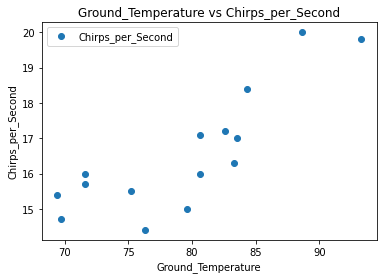

In [ ]:
df.plot(x='Ground_Temperature', y='Chirps_per_Second', style='o')
plt.title('Ground_Temperature vs Chirps_per_Second')
plt.xlabel('Ground_Temperature')
plt.ylabel('Chirps_per_Second')
plt.show()

1) Is there any relationship between the feature and target - Yes

2) Is there any linear relationship between the feature and target - kind of

3) May be transformation is required to get a st. line

In [ ]:
df.corr()

,Chirps_per_Second,Ground_Temperature
Chirps_per_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


a positive correlation 0.8 is found. 

so the data is in linear relationship indeed. No transformation is required

we can go ahead and develop a linear regression model

In [ ]:
#Linear regression model
#Preparing the data
X = df.loc[:, ['Ground_Temperature']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps_per_Second'].values # target as arrays
# Syntax : df.loc[:, :-1]

#splitting
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#model
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * x + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df1



,True_Target,Predicted_target
0,16.3,17.464941
1,15.7,14.900598
2,17.2,17.311518


In [ ]:
print('Linear regression equation y={}x+ {}'.format(regressor.coef_[0], regressor.intercept_))

print('intercept:', regressor.intercept_)# intercept C
print('coefficients:', regressor.coef_)# slope m

from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


Linear regression equation y=0.21917454656373928x+ -0.7922992092728656
intercept: -0.7922992092728656
coefficients: [0.21917455]
R2- SCORE: -0.7618998174490781


In [ ]:
#since the data is too small for finding r2 score is resultiong in negative value.
print('R2- SCORE:', metrics.r2_score(X,y))

R2- SCORE: -85.33242546564048


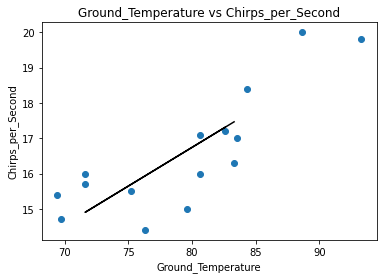

In [ ]:
#Chart the original data and the equation on the chart
plt.scatter(X, y)
plt.plot(X_test,y_pred,color="black")

plt.title('Ground_Temperature vs Chirps_per_Second')
plt.xlabel('Ground_Temperature')
plt.ylabel('Chirps_per_Second')
plt.show()

In [ ]:
regressor.predict([[95]]) # perils of extrapolation,giving a value grater than max value of ground temp

array([20.02928271])

In [ ]:
#interpolation
y=int(input()) #y=chirps_per_second
'''
y=m*x + c
x=(y-c)/m
regressor.intercept_ =C
 regressor.coef_= M'''
x=(y-regressor.intercept_)/regressor.coef_
print(x)

18
[85.74124826]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
print("isnull?: ", df.isnull().sum())
print("shape : ", df.shape )

isnull?:  Brain    0
Body     0
dtype: int64
shape :  (62, 2)


No null values

No duplicates


In [ ]:
df1 = df.drop_duplicates()
df1.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)

IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Brain    10
Body      9
dtype: int64

there are outlliers present in both columns. need to do capping

In [ ]:

lower_limit = df["Brain"].quantile(0.25)  
upper_limit = df["Brain"].quantile(0.75)

df["Brain_capped"] = np.where(df["Brain"]> upper_limit, upper_limit,
                              np.where(df["Brain"]< lower_limit, lower_limit,
                                       df["Brain"]))
df

,Brain,Body,Brain_capped,Body_capped
0,3.385,44.5,3.3850,44.50
1,0.480,15.5,0.6000,15.50
2,1.350,8.1,1.3500,8.10
3,465.000,423.0,48.2025,166.00
4,36.330,119.5,36.3300,119.50
...,...,...,...,...
57,160.000,169.0,48.2025,166.00
58,0.900,2.6,0.9000,4.25
59,1.620,11.4,1.6200,11.40
60,0.104,2.5,0.6000,4.25


In [ ]:

lower_limit = df["Body"].quantile(0.25)  
upper_limit = df["Body"].quantile(0.75)

df["Body_capped"] = np.where(df["Body"]> upper_limit, upper_limit,
                              np.where(df["Body"]< lower_limit, lower_limit,
                                       df["Body"]))
df

,Brain,Body,Brain_capped,Body_capped
0,3.385,44.5,3.3850,44.50
1,0.480,15.5,0.6000,15.50
2,1.350,8.1,1.3500,8.10
3,465.000,423.0,48.2025,166.00
4,36.330,119.5,36.3300,119.50
...,...,...,...,...
57,160.000,169.0,48.2025,166.00
58,0.900,2.6,0.9000,4.25
59,1.620,11.4,1.6200,11.40
60,0.104,2.5,0.6000,4.25


X=Body capped

Y=Brain capped

preddicting brain wt based on body wt

In [ ]:
#fixing feature as x and target as y
X = df.loc[:, ['Body_capped']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Brain_capped'].values # target as arrays
# Syntax : df.loc[:, :-1]

#splitting
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#modelling
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * x + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2501 * x + -0.9441


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
# "Syntax : varName.predict(test_features)"
y_pred

array([ 4.30812008, 40.57350224,  1.75703802,  2.18221836, 40.57350224,
       40.57350224,  2.93253662,  0.11884317, 38.32254749, 40.57350224,
       19.31448511,  8.8600508 ,  5.45860806])

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.822741048544859


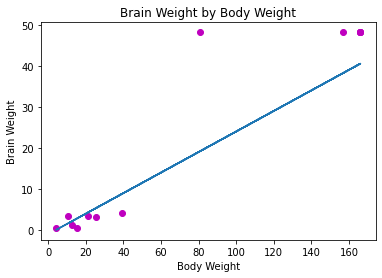

In [ ]:
#Chart the original data and the equation on the chart.

plt.scatter(X_test, y_test, color='m')
plt.plot(X_test, y_pred)
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

#another approach in outlier manipulation

In [ ]:
mask = (df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))
df1[mask] = np.nan
df1.isna().sum() # gives no. outliers masked as Nan values

Brain    10
Body      9
dtype: int64

In [ ]:
df1 = df1[df1['Brain'].notna()] # considering values that are not na
df1= df1[df1['Body'].notna()]
df1.isna().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
#fixing feature as x and target as y
X = df.loc[:, ['Body']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Brain'].values # target as arrays
# Syntax : df.loc[:, :-1]

#splitting
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#modelling
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * x + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Linear Regression Equation: y = 0.9054 * x + -65.3450
R2- SCORE: 0.8624271836529298


this is a very good model , so insted of dropping the outliers and changing it to median, it is good to just ignore Nan values(masked outliers). r2 score is nearing 1. 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Rank,52.0,2.038462,0.862316,1.0,1.00,2.0,3.00,3.0
Year,52.0,7.480769,5.507536,0.0,3.00,7.0,11.00,25.0
Degree,52.0,0.653846,0.480384,0.0,0.00,1.0,1.00,1.0
YSdeg,52.0,16.115385,10.222340,1.0,6.75,15.5,23.25,35.0
Salary,52.0,23797.653846,5917.289154,15000.0,18246.75,23719.0,27258.50,38045.0


X= Sex, Rank, Year, Degree, YSdeg

Y=Salary


In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Sex       0
Rank      0
Year      1
Degree    0
YSdeg     0
Salary    0
dtype: int64

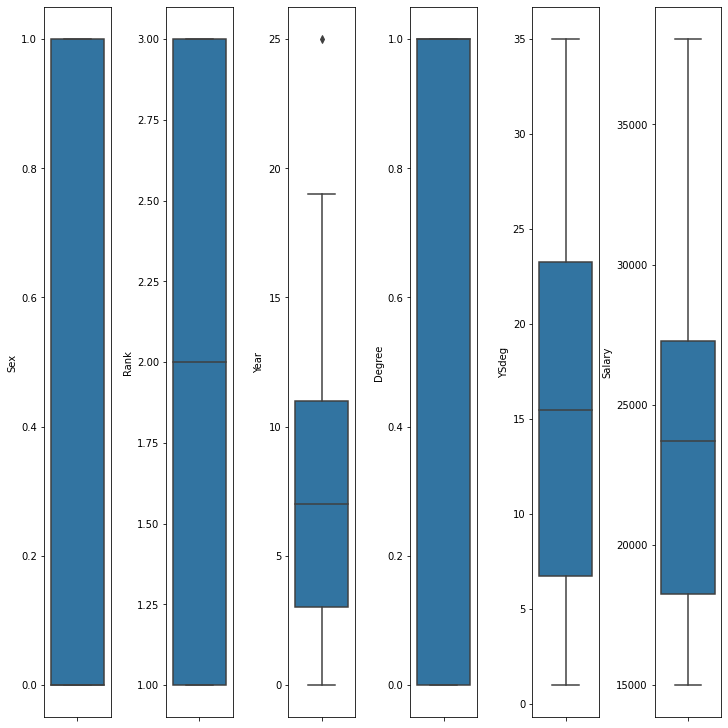

In [ ]:
#create box plots
fig,ax=plt.subplots(ncols=6,nrows=1,figsize=(10,10))
index=0
ax=ax.flatten()
for col,value in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index+=1

#introducing hyperparameters
plt.tight_layout(pad=0.3,w_pad=0.3,h_pad=5.0)

we can see that one outlier in Year box plot

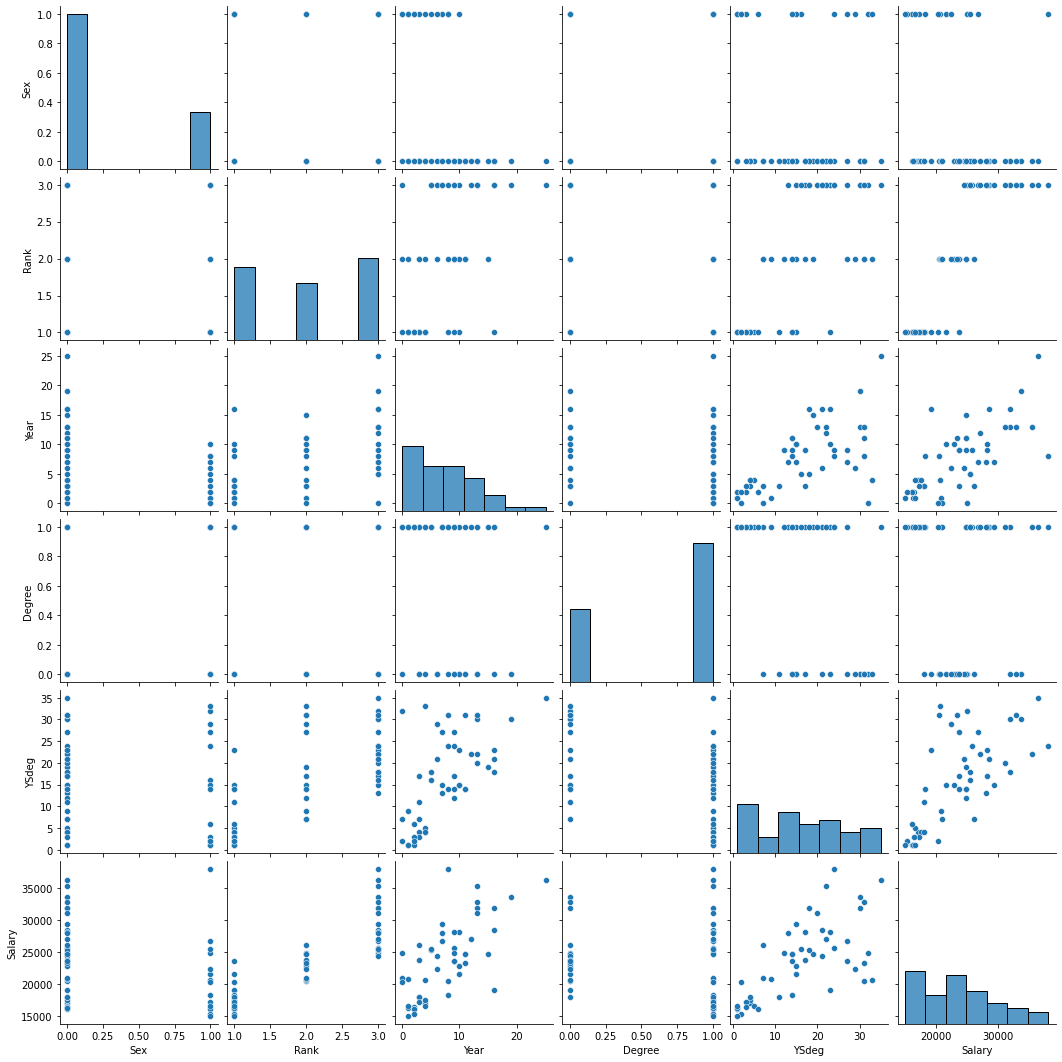

In [ ]:
sns.pairplot(df)

##look at last row. individual features Vs Salary.

as we can see year Vs Salary and YSdeg Vs salary are in liear relation ship.

for other features, to identify if there is any linear relation ship, we need to do correlation.

In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [ ]:
df.corr() # we can also look at the salary column for all corrs.

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


as we can see, Sex Vs Salary has a negative corr(-0.25)==just negative (>0.2)

and Degree Vs Salary also has a negative corr(-0.069)==Zero correlation(<0.2)==>Try transforming

all other features have positive correlation. indicating there is a linear relationship between feature and the target(salary)


In [ ]:

#fixing features to X and target to y
X = df.loc[:, ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Salary'].values # target as arrays
# Syntax : df.loc[:, :-1]

#splitting
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Standard scaling
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it


#modelling
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * x + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

#evaluation metrics
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9263635825853083


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df
# Salary = (464.05 *Sex + 5019.799*Rank +....+-1225.45*Ysdeg )+ 23788.56

,Coefficient
Sex,711.883715
Rank,4904.726800
Year,2191.170790
Degree,-693.295732
YSdeg,-1420.101379


###Sex is the least important factor in determining salary according to the coefficient of scaled features

#Feature selection

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],selector.support_))

[('Sex', False),
 ('Rank', True),
 ('Year', False),
 ('Degree', False),
 ('YSdeg', False)]

#sequential Feature selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=4)
sfs.fit(X_train, y_train)
print(list(zip(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'],sfs.get_support())))

[('Sex', True), ('Rank', True), ('Year', True), ('Degree', False), ('YSdeg', True)]


#column selection using s defined function

In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [ ]:
def combinations(L):
    if L:
        result=combinations(L[:-1])
        return result+[i+[L[-1]] for i in result]
    else: 
        return [[]]
    
#n=int(input())    
#jlist=list(map(int,input().split(" ")))[:n]
combi=combinations(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']) 
combi=combi[1:]
print(combi)
print(len(combi))

[['Sex'], ['Rank'], ['Sex', 'Rank'], ['Year'], ['Sex', 'Year'], ['Rank', 'Year'], ['Sex', 'Rank', 'Year'], ['Degree'], ['Sex', 'Degree'], ['Rank', 'Degree'], ['Sex', 'Rank', 'Degree'], ['Year', 'Degree'], ['Sex', 'Year', 'Degree'], ['Rank', 'Year', 'Degree'], ['Sex', 'Rank', 'Year', 'Degree'], ['YSdeg'], ['Sex', 'YSdeg'], ['Rank', 'YSdeg'], ['Sex', 'Rank', 'YSdeg'], ['Year', 'YSdeg'], ['Sex', 'Year', 'YSdeg'], ['Rank', 'Year', 'YSdeg'], ['Sex', 'Rank', 'Year', 'YSdeg'], ['Degree', 'YSdeg'], ['Sex', 'Degree', 'YSdeg'], ['Rank', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Degree', 'YSdeg'], ['Year', 'Degree', 'YSdeg'], ['Sex', 'Year', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
31


In [ ]:
R2_Scores=[]
for i in combi:
  x_combi=df[i].values #combinations of features
  y = df['Salary'].values #array of targets


  #splitting
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(x_combi, y, test_size=0.2, random_state=0)


  #scaling
  from sklearn.preprocessing import StandardScaler ## standrard scaling 
  scaler=StandardScaler()#initialise to a variable
  scaler.fit(X_train) # we are finding the values of mean and sd from the td
  X_train_scaled=scaler.transform(X_train)# fit (mean, sd) and then transform the training data
  X_test_scaled=scaler.transform(X_test) #only transform the test dataset, dont fit it

 #model training
  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train_scaled, y_train)

  y_pred = regressor.predict(X_test_scaled) # given the features of the test dataset, it will give the final predictions
  from sklearn import metrics
  R2_Scores.append(metrics.r2_score(y_test,y_pred))

In [ ]:
df2 = pd.DataFrame({'Feature_combinations': combi, 'R2_Scores': R2_Scores})
df2

,Feature_combinations,R2_Scores
0,[Sex],0.052731
1,[Rank],0.492340
2,"[Sex, Rank]",0.506755
3,[Year],0.474118
4,"[Sex, Year]",0.450622
5,"[Rank, Year]",0.704931
6,"[Sex, Rank, Year]",0.685500
7,[Degree],-0.000578
8,"[Sex, Degree]",0.019030
9,"[Rank, Degree]",0.447217


In [ ]:
print(df2["R2_Scores"].max())

print(df2["R2_Scores"].argmax())
df2["Feature_combinations"][df2["R2_Scores"].argmax()]

0.0016958172486379874
0


['Sex']